# IPL 2008 -2020

## Importing Libraries 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(12,10)})
#plt.figure(figsize=(15,12))



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv
/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv


## Importing Dataset

In [2]:
matches = pd.read_csv("../input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv")
deliveries = pd.read_csv("../input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv")

In [3]:
team_names = matches.team1.unique()
team_names

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [4]:
team_names_abv = ["RCB","KXIP","DD","MI","KKR","RR","DeCh","CSK","KTK","PWI","SH","GL","RPS","RPS","DC"]
matches.replace(team_names,team_names_abv,inplace = True)

In [5]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DD,RR,RR,bat,DD,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,DeCh,DeCh,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,RCB,MI,MI,field,RCB,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,MI,DC,DC,field,MI,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,RCB,SH,SH,field,SH,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,DC,SH,DC,bat,DC,runs,17.0,N,NaN,PR Reiffel,S Ravi


## Data Cleaning

<AxesSubplot:>

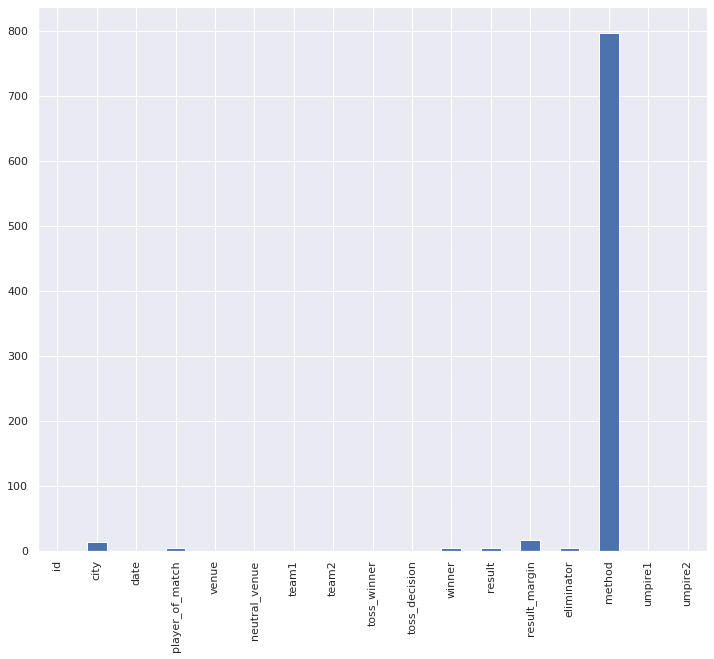

In [6]:
matches.isnull().sum().plot(kind='bar')

### Fixing Non D/L Matches

In [7]:
matches = matches.fillna(value={'method':0})


In [8]:
matches[matches.result.isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,DD,PWI,DD,bat,NaN,NaN,NaN,NaN,0,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,RCB,RR,RR,field,NaN,NaN,NaN,NaN,0,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,RCB,DD,RCB,field,NaN,NaN,NaN,NaN,0,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,RCB,RR,RR,field,NaN,NaN,NaN,NaN,0,UV Gandhe,NJ Llong


### Removing Not Result Matches

In [9]:
matches = matches[matches['result'].notnull()]


### Fixing Result Margin of Tie Matches

In [10]:
matches.loc[matches.result=='tie', 'result_margin']=0

### Fixing Missing Values of City according to their Venues

In [11]:
matches.venue[matches.city.isnull()]

399                Sharjah Cricket Stadium
402    Dubai International Cricket Stadium
403    Dubai International Cricket Stadium
404                Sharjah Cricket Stadium
406                Sharjah Cricket Stadium
407    Dubai International Cricket Stadium
408                Sharjah Cricket Stadium
409    Dubai International Cricket Stadium
410    Dubai International Cricket Stadium
413                Sharjah Cricket Stadium
414                Sharjah Cricket Stadium
415    Dubai International Cricket Stadium
417    Dubai International Cricket Stadium
Name: venue, dtype: object

In [12]:
matches.city[matches.venue =='Dubai International Cricket Stadium'].unique()

array([nan, 'Dubai'], dtype=object)

In [13]:
matches.city[matches.venue == 'Sharjah Cricket Stadium'].unique()

array([nan, 'Sharjah'], dtype=object)

In [14]:
def venue_func(x):
    if x == 'Dubai International Cricket Stadium':
        return 'Dubai'
    if x == 'Sharjah Cricket Stadium':
        return 'Sharjah'
    else :
        return x
    
matches.city = matches.venue.apply(venue_func)

In [15]:
matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

## Number of Matches at Venues

<AxesSubplot:>

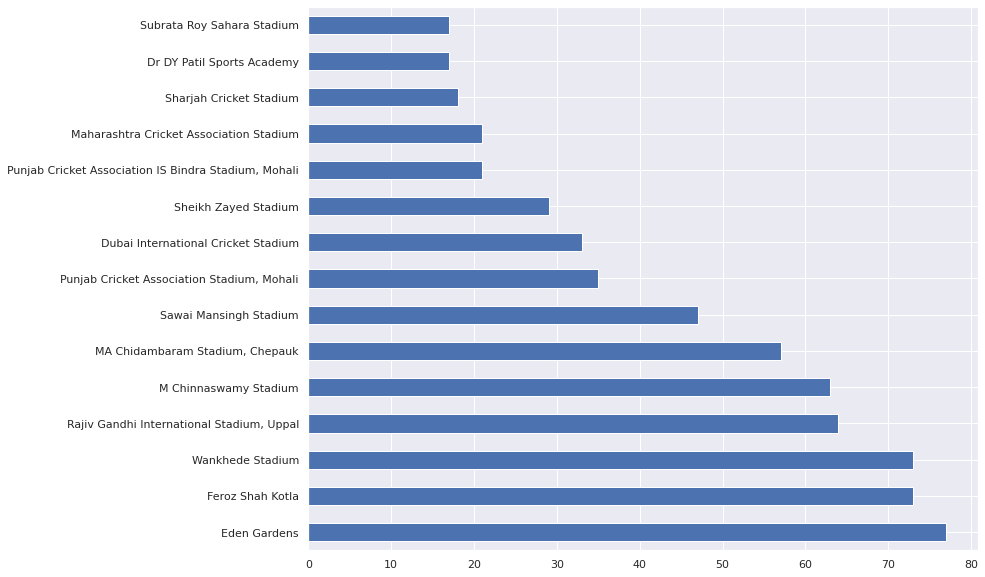

In [16]:
matches.venue.value_counts()[:15].plot(kind = 'barh')


## Most Number of D/L Matches at different venues

In [17]:
matches.loc[matches.method == 'D/L',['venue']].value_counts()

venue                                              
Eden Gardens                                           4
Feroz Shah Kotla                                       3
M Chinnaswamy Stadium                                  3
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    2
Rajiv Gandhi International Stadium, Uppal              2
Kingsmead                                              1
Nehru Stadium                                          1
Newlands                                               1
Sawai Mansingh Stadium                                 1
SuperSport Park                                        1
dtype: int64

## Toss Desicions

<AxesSubplot:ylabel='toss_decision'>

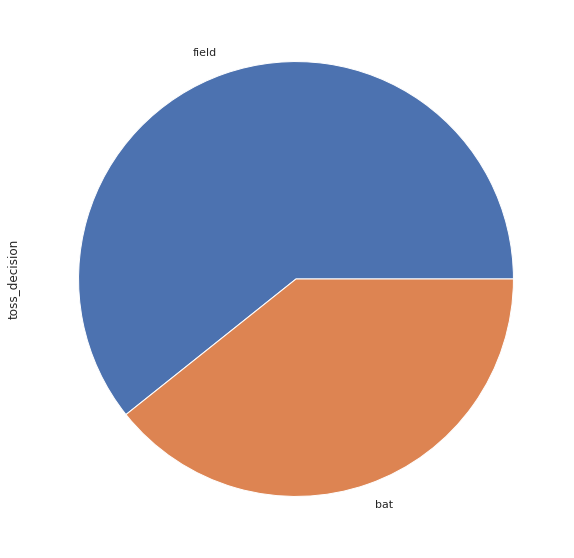

In [18]:
matches.toss_decision.value_counts().plot(kind = 'pie')

## Total Wins/Teams

<AxesSubplot:ylabel='toss_winner'>

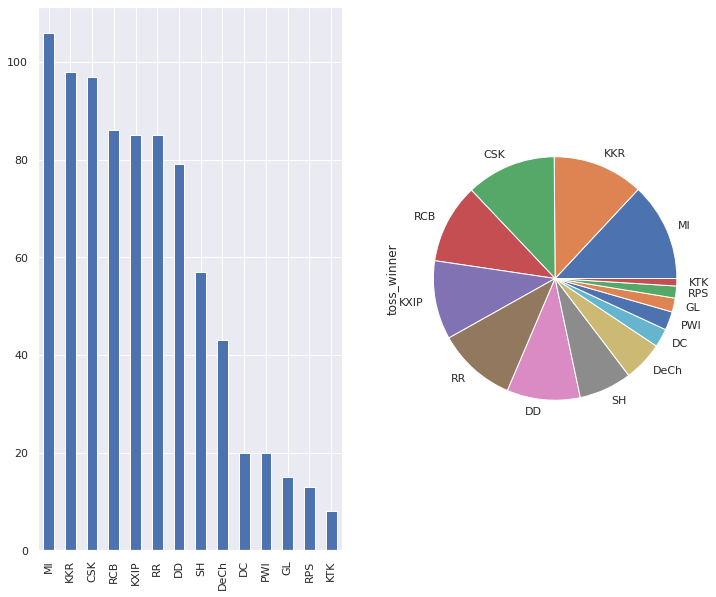

In [19]:

plt.subplot(1,2,1)
matches.toss_winner.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
matches.toss_winner.value_counts().plot(kind = 'pie')

## Total Matches per Year

<AxesSubplot:>

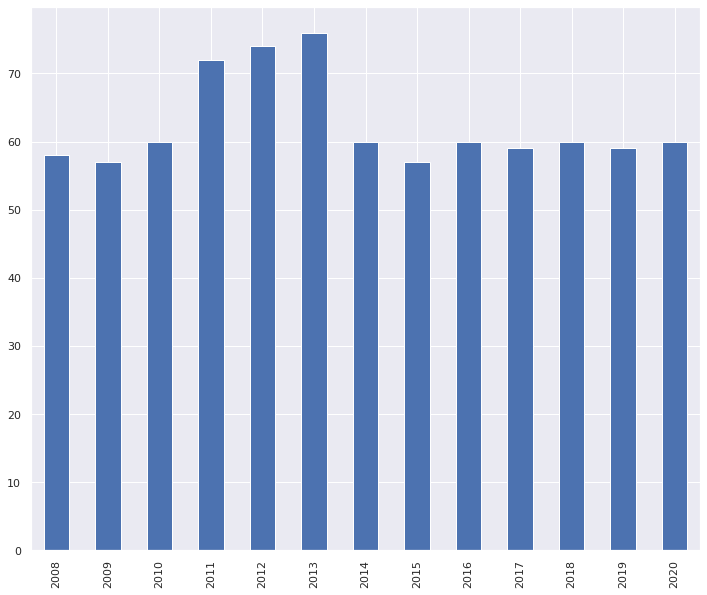

In [20]:
matches['season'] = matches['date'].str[:4].astype(int)
matches.season.value_counts().plot(kind = 'bar')

## Matches win by every Team

<AxesSubplot:>

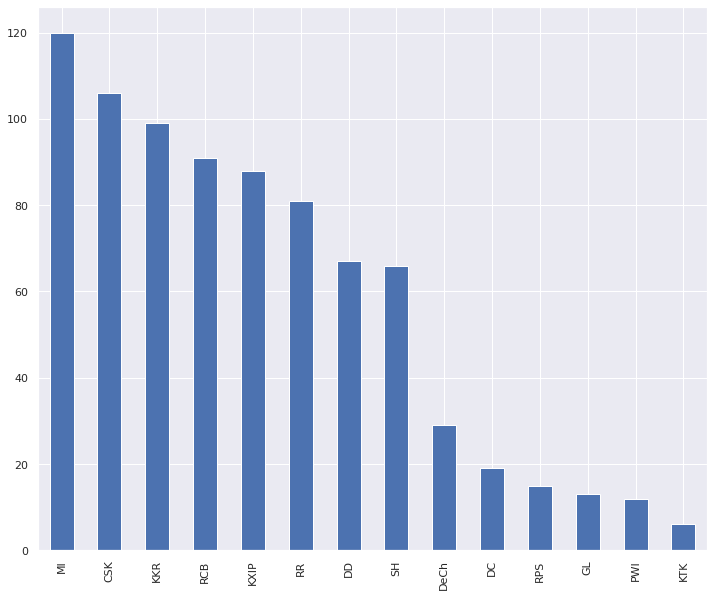

In [21]:
total_win = matches.winner.value_counts()
total_win.plot(kind = 'bar')

## Total Matches Played by every Team

<AxesSubplot:>

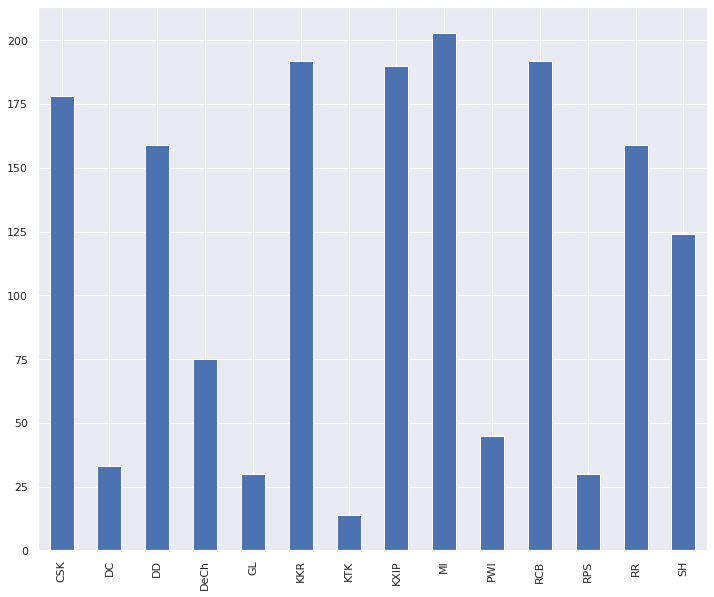

In [22]:
total_matches = (matches.team1.value_counts()+ matches.team2.value_counts())
total_matches.plot(kind = 'bar')

## Win Percentage of every team

<AxesSubplot:>

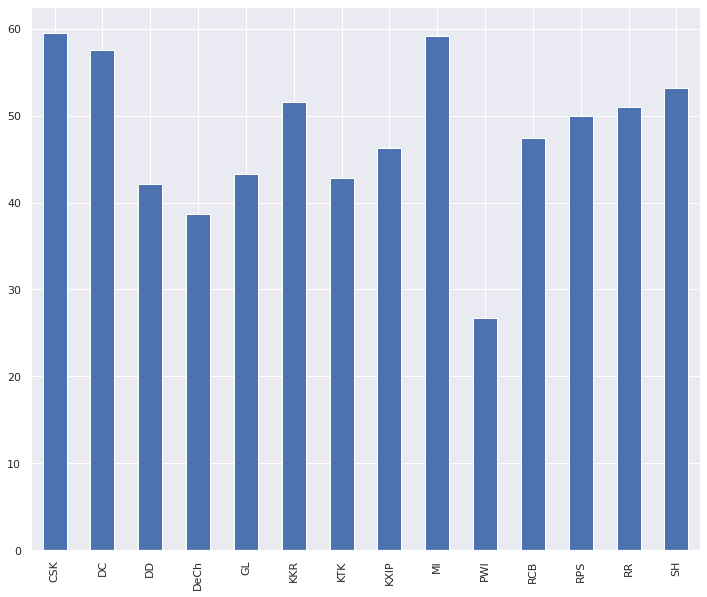

In [23]:
win_percentage = total_win/total_matches*100
win_percentage.plot(kind = 'bar')

## Most Eliminator Matches Wins per Teams

<AxesSubplot:ylabel='winner'>

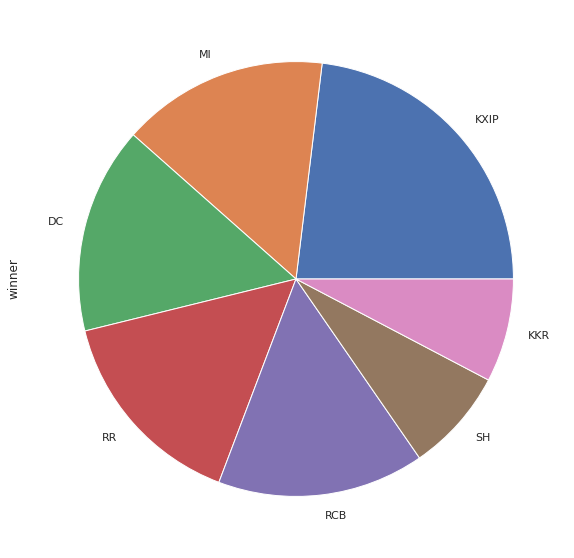

In [24]:
matches.winner[matches.eliminator =='Y'].value_counts().plot(kind = 'pie')

## Most Player of Match Award Winner

<AxesSubplot:>

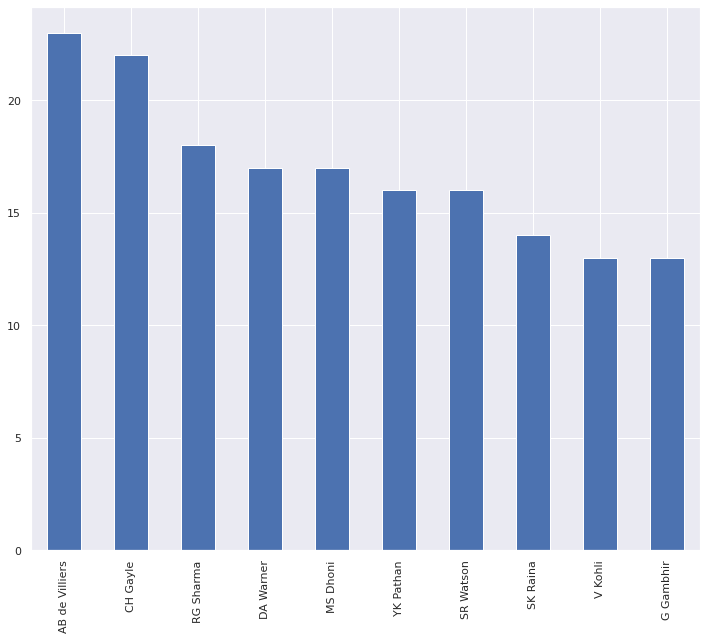

In [25]:
matches.player_of_match.value_counts()[:10].plot(kind = 'bar')

## Ball-by-Ball Analysis

In [26]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [27]:
deliveries.replace(team_names,team_names_abv,inplace = True)

<AxesSubplot:xlabel='inning', ylabel='count'>

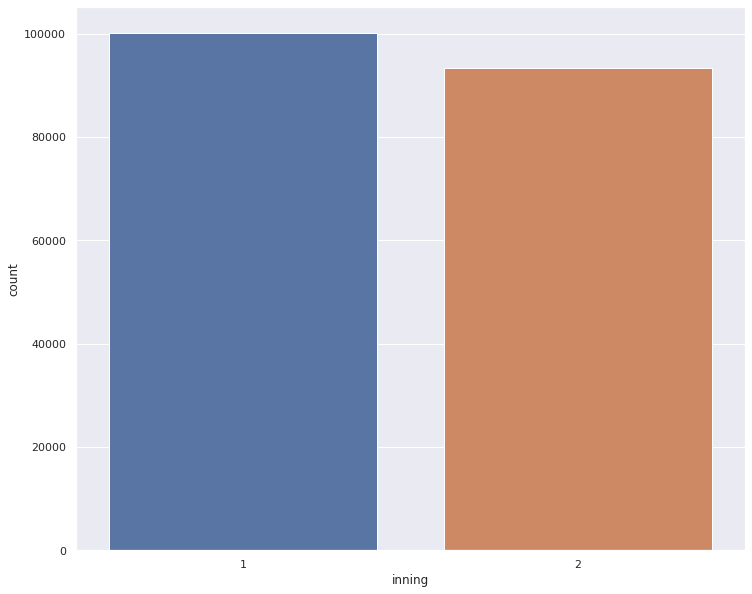

In [28]:
sns.countplot(x=deliveries.inning)

In [29]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

<AxesSubplot:>

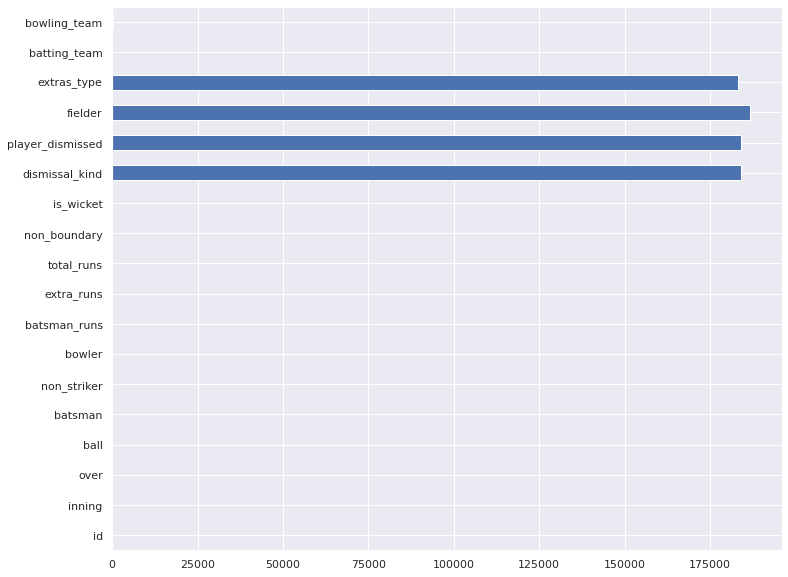

In [30]:
deliveries.isnull().sum().plot(kind = 'barh')

### Most Dismissal Ways of Batsman

In [31]:
deliveries['dismissal_kind'].value_counts()

caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: dismissal_kind, dtype: int64

### Most Matches Played by Batsman

In [32]:
most_match_bats = deliveries.groupby(['batsman']).agg({'id': lambda x: len(set(x))}).sort_values(ascending = False,by = 'id')
most_match_bats[:15]

,id
batsman,
RG Sharma,194
SK Raina,189
V Kohli,184
MS Dhoni,182
RV Uthappa,182
KD Karthik,176
S Dhawan,175
AB de Villiers,156
YK Pathan,153


### Most Matches Played by Bowler

In [33]:
bowl_match=deliveries.groupby(['bowler']).agg({'id': lambda x : len(set(x))}).sort_values(ascending = False,by = 'id')
bowl_match[:15]

,id
bowler,
PP Chawla,163
Harbhajan Singh,157
RA Jadeja,155
R Ashwin,151
A Mishra,150
DJ Bravo,137
SL Malinga,122
B Kumar,121
UT Yadav,120


### Most delivieries bowled Bowlers

<AxesSubplot:>

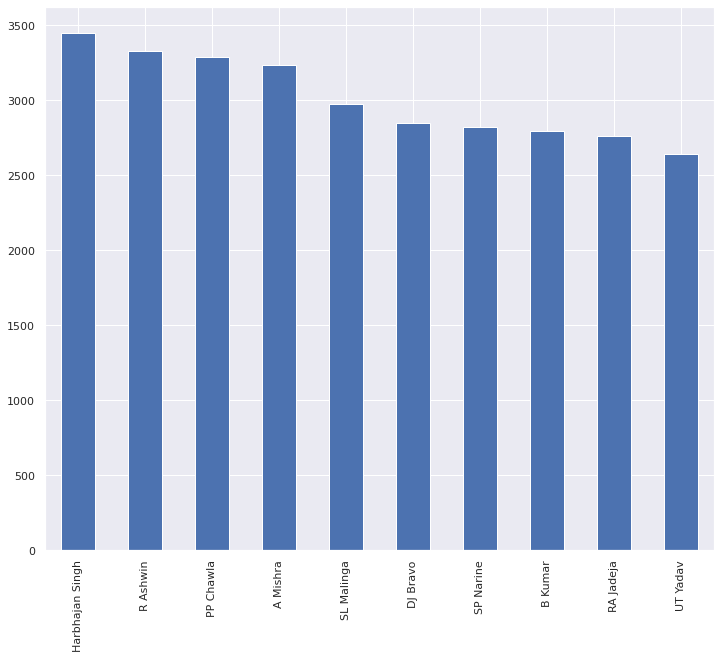

In [34]:
deliveries.bowler.value_counts()[:10].plot(kind = 'bar')

### Batsman having faced maximium balls

In [35]:
bats = deliveries.batsman.value_counts()
bats[:15]

V Kohli           4609
S Dhawan          4208
RG Sharma         4088
SK Raina          4041
DA Warner         3819
RV Uthappa        3658
G Gambhir         3524
MS Dhoni          3493
CH Gayle          3342
AM Rahane         3325
AB de Villiers    3264
KD Karthik        3023
AT Rayudu         2970
SR Watson         2888
MK Pandey         2772
Name: batsman, dtype: int64

### Top Batsmans(According to Runs)

In [36]:
runs = deliveries.groupby(['batsman']).batsman_runs.sum().sort_values(ascending=False)
runs[:15]

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4849
CH Gayle          4772
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
AM Rahane         3933
SR Watson         3874
KD Karthik        3823
AT Rayudu         3659
MK Pandey         3268
Name: batsman_runs, dtype: int64

### Top Batsman(According to Strike Rates)

<AxesSubplot:>

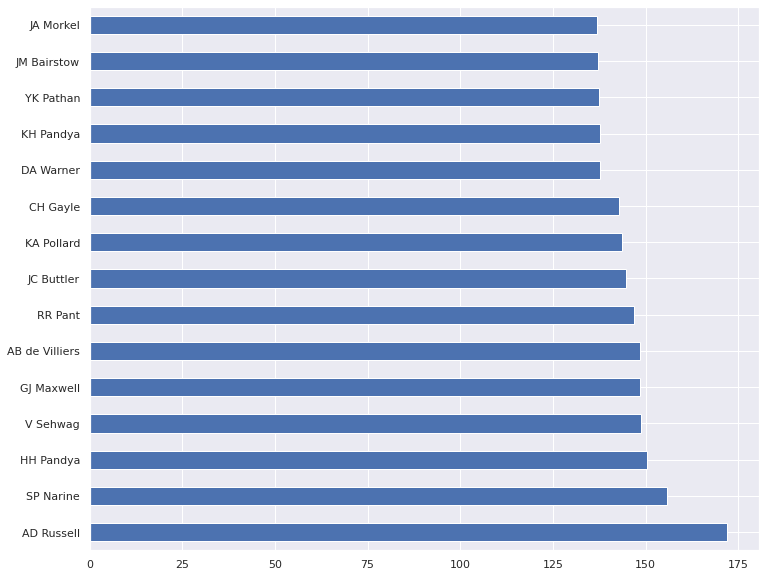

In [37]:
strike_rate = (runs/bats[:100]*100).sort_values(ascending = False)
strike_rate[:15].plot(kind = 'barh')

### Max no. of times Batsman getting out

In [38]:
out = deliveries.groupby(['batsman']).is_wicket.sum().sort_values(ascending = False)
out[:15]

batsman
RG Sharma         177
RV Uthappa        169
V Kohli           163
SK Raina          160
KD Karthik        152
S Dhawan          152
G Gambhir         135
PA Patel          127
DA Warner         126
MS Dhoni          126
SR Watson         125
AM Rahane         125
AT Rayudu         123
CH Gayle          116
AB de Villiers    114
Name: is_wicket, dtype: int64

### Max Average by Batsman

In [39]:
avg = (runs/out[:240]).sort_values(ascending = False)
avg[:15]

batsman
HM Amla           44.384615
KL Rahul          42.693548
AB de Villiers    42.535088
DA Warner         41.698413
JP Duminy         41.408163
CH Gayle          41.137931
ML Hayden         41.000000
LMP Simmons       39.962963
JM Bairstow       39.500000
KS Williamson     39.487805
OA Shah           38.923077
SE Marsh          38.703125
MEK Hussey        38.019231
A Symonds         37.461538
MS Dhoni          36.761905
dtype: float64

### Batsman hitted maximium number of 6s

In [40]:
deliveries.batsman[deliveries.batsman_runs ==6].value_counts()[:15]

CH Gayle          349
AB de Villiers    235
MS Dhoni          216
RG Sharma         214
V Kohli           202
KA Pollard        198
DA Warner         195
SK Raina          194
SR Watson         190
RV Uthappa        163
YK Pathan         159
Yuvraj Singh      149
AT Rayudu         132
BB McCullum       130
AD Russell        129
Name: batsman, dtype: int64

### Batsman hitted maximium number of 4s

In [41]:
deliveries.batsman[deliveries.batsman_runs ==4].value_counts()[:10]

S Dhawan          591
DA Warner         510
V Kohli           504
SK Raina          493
G Gambhir         492
RG Sharma         458
RV Uthappa        454
AM Rahane         416
AB de Villiers    390
CH Gayle          384
Name: batsman, dtype: int64

### No. of Times Batsman Hitted Six on No-Ball

In [42]:
deliveries.batsman[deliveries.total_runs==7].value_counts()[:10]

CH Gayle          5
KA Pollard        3
AB de Villiers    3
DA Warner         3
BB McCullum       2
SPD Smith         2
JC Archer         2
MS Dhoni          2
RG Sharma         2
SK Raina          1
Name: batsman, dtype: int64

### Most Wickets by Bowler

In [43]:
most_wickets = deliveries.groupby(['bowler']).is_wicket.sum().sort_values(ascending = False)
most_wickets[:15]

bowler
SL Malinga         188
DJ Bravo           175
A Mishra           169
PP Chawla          164
Harbhajan Singh    161
R Ashwin           153
B Kumar            146
SP Narine          143
UT Yadav           137
R Vinay Kumar      127
YS Chahal          124
RA Jadeja          122
A Nehra            121
JJ Bumrah          119
Z Khan             119
Name: is_wicket, dtype: int64

### Bowlers who give more extra runs(Including LB,NB,Wide) per match

In [44]:
(deliveries.groupby(['bowler']).extra_runs.sum()/bowl_match['id']).sort_values(ascending = False)[:15]

bowler
AA Noffke           6.000000
Abdur Razzak        6.000000
Umar Gul            5.333333
SW Tait             5.285714
Mashrafe Mortaza    5.000000
SM Harwood          4.333333
VS Yeligati         4.000000
Monu Kumar          4.000000
SD Chitnis          4.000000
AF Milne            3.800000
GC Viljoen          3.166667
WD Parnell          3.076923
AP Dole             3.000000
JR Hazlewood        3.000000
RG More             3.000000
dtype: float64

### Highest Scores by team

In [45]:
deliveries.groupby(['id','batting_team']).total_runs.sum().sort_values(ascending = False)[:15]

id       batting_team
598027   RCB             263
980987   RCB             248
419137   CSK             246
1136604  KKR             245
335983   CSK             240
829795   RCB             235
501260   KXIP            232
1178422  KKR             232
733987   KXIP            231
501223   DD              231
1175366  SH              231
1082641  KXIP            230
1216515  DC              228
980907   RCB             227
829785   RCB             226
Name: total_runs, dtype: int64

### Wicket Hauls by bowlers

In [46]:
deliveries.groupby(['id','bowler']).is_wicket.sum().sort_values(ascending = False).value_counts()


0    3914
1    3136
2    1761
3     632
4     184
5      35
6       5
Name: is_wicket, dtype: int64

Only 6 times in IPL, bowler able to take 6 wickets in Match.
Only 5 times in IPL, bowler took 5 Wickets.

### Highest Scores by Batsman in a Match

In [47]:

high_scores=(deliveries.groupby(['batsman','id','batting_team']).total_runs.sum()-deliveries.groupby(['batsman','id','batting_team']).extra_runs.sum()).sort_values(ascending = False)[:15]
high_scores

batsman         id       batting_team
CH Gayle        598027   RCB             175
BB McCullum     335982   KKR             158
AB de Villiers  829795   RCB             133
KL Rahul        1216510  KXIP            132
AB de Villiers  980987   RCB             129
CH Gayle        548372   RCB             128
RR Pant         1136602  DD              128
M Vijay         419137   CSK             127
DA Warner       1082627  SH              126
V Sehwag        734047   KXIP            122
PC Valthaty     501206   KXIP            120
V Sehwag        501243   DD              119
A Symonds       335990   DeCh            117
CH Gayle        829785   RCB             117
SR Watson       1136620  CSK             117
dtype: int64